Customer Churn Prediction


Step 1. Imports


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


Step 2. Load the data

In [4]:
# Load dataset
df = pd.read_csv('../data/raw/Customer churn data.csv')
print("Shape",df.shape)
df.head()



Shape (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Step 3. Initial inspection

In [5]:
# Info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [6]:
print(df.describe())


        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [7]:
# Missing Values
print(df.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [8]:
# Target Distribution
print(df['churn'].value_counts())

churn
0    7963
1    2037
Name: count, dtype: int64


Step 4. Exploratory Data Analysis (visualizations)

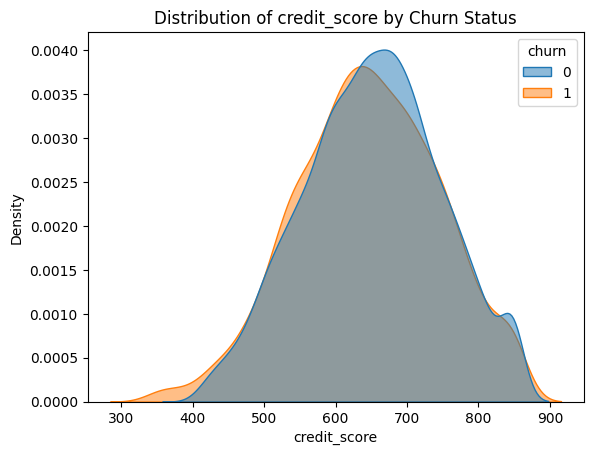

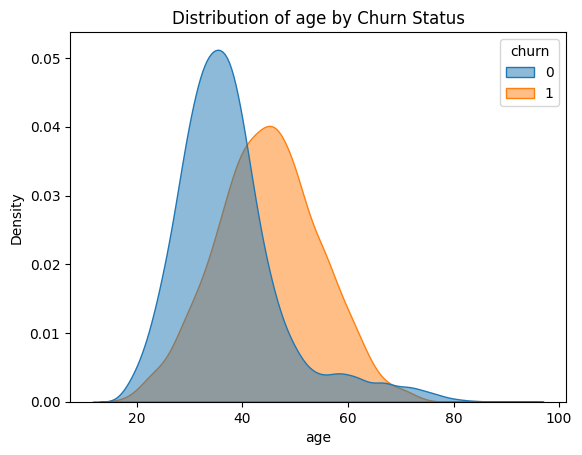

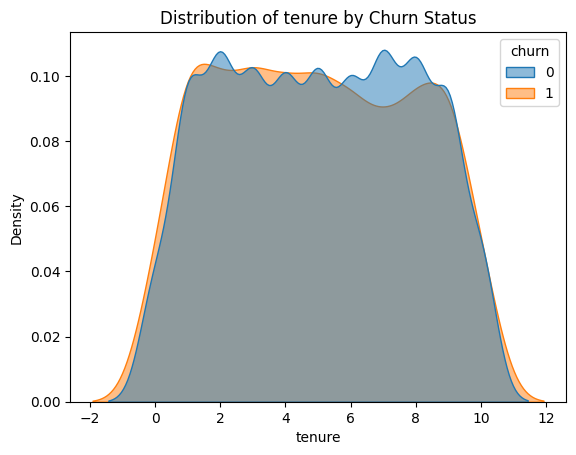

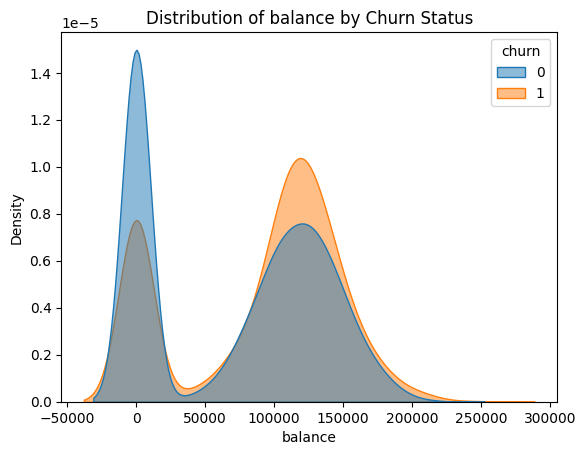

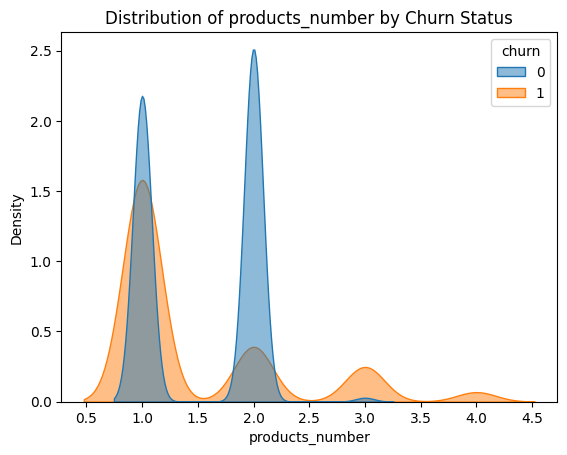

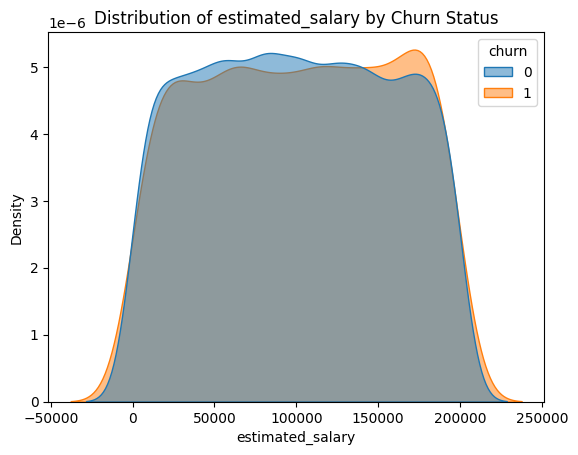

In [9]:
nums_cols=['credit_score','age','tenure','balance','products_number','estimated_salary']

for cols in nums_cols:
    sns.kdeplot(data=df, x=cols, hue='churn', fill=True, alpha=0.5, common_norm=False)  
    plt.title(f'Distribution of {cols} by Churn Status')
    plt.savefig(f"../reports/{cols}_churn_distribution.png")

    plt.show()

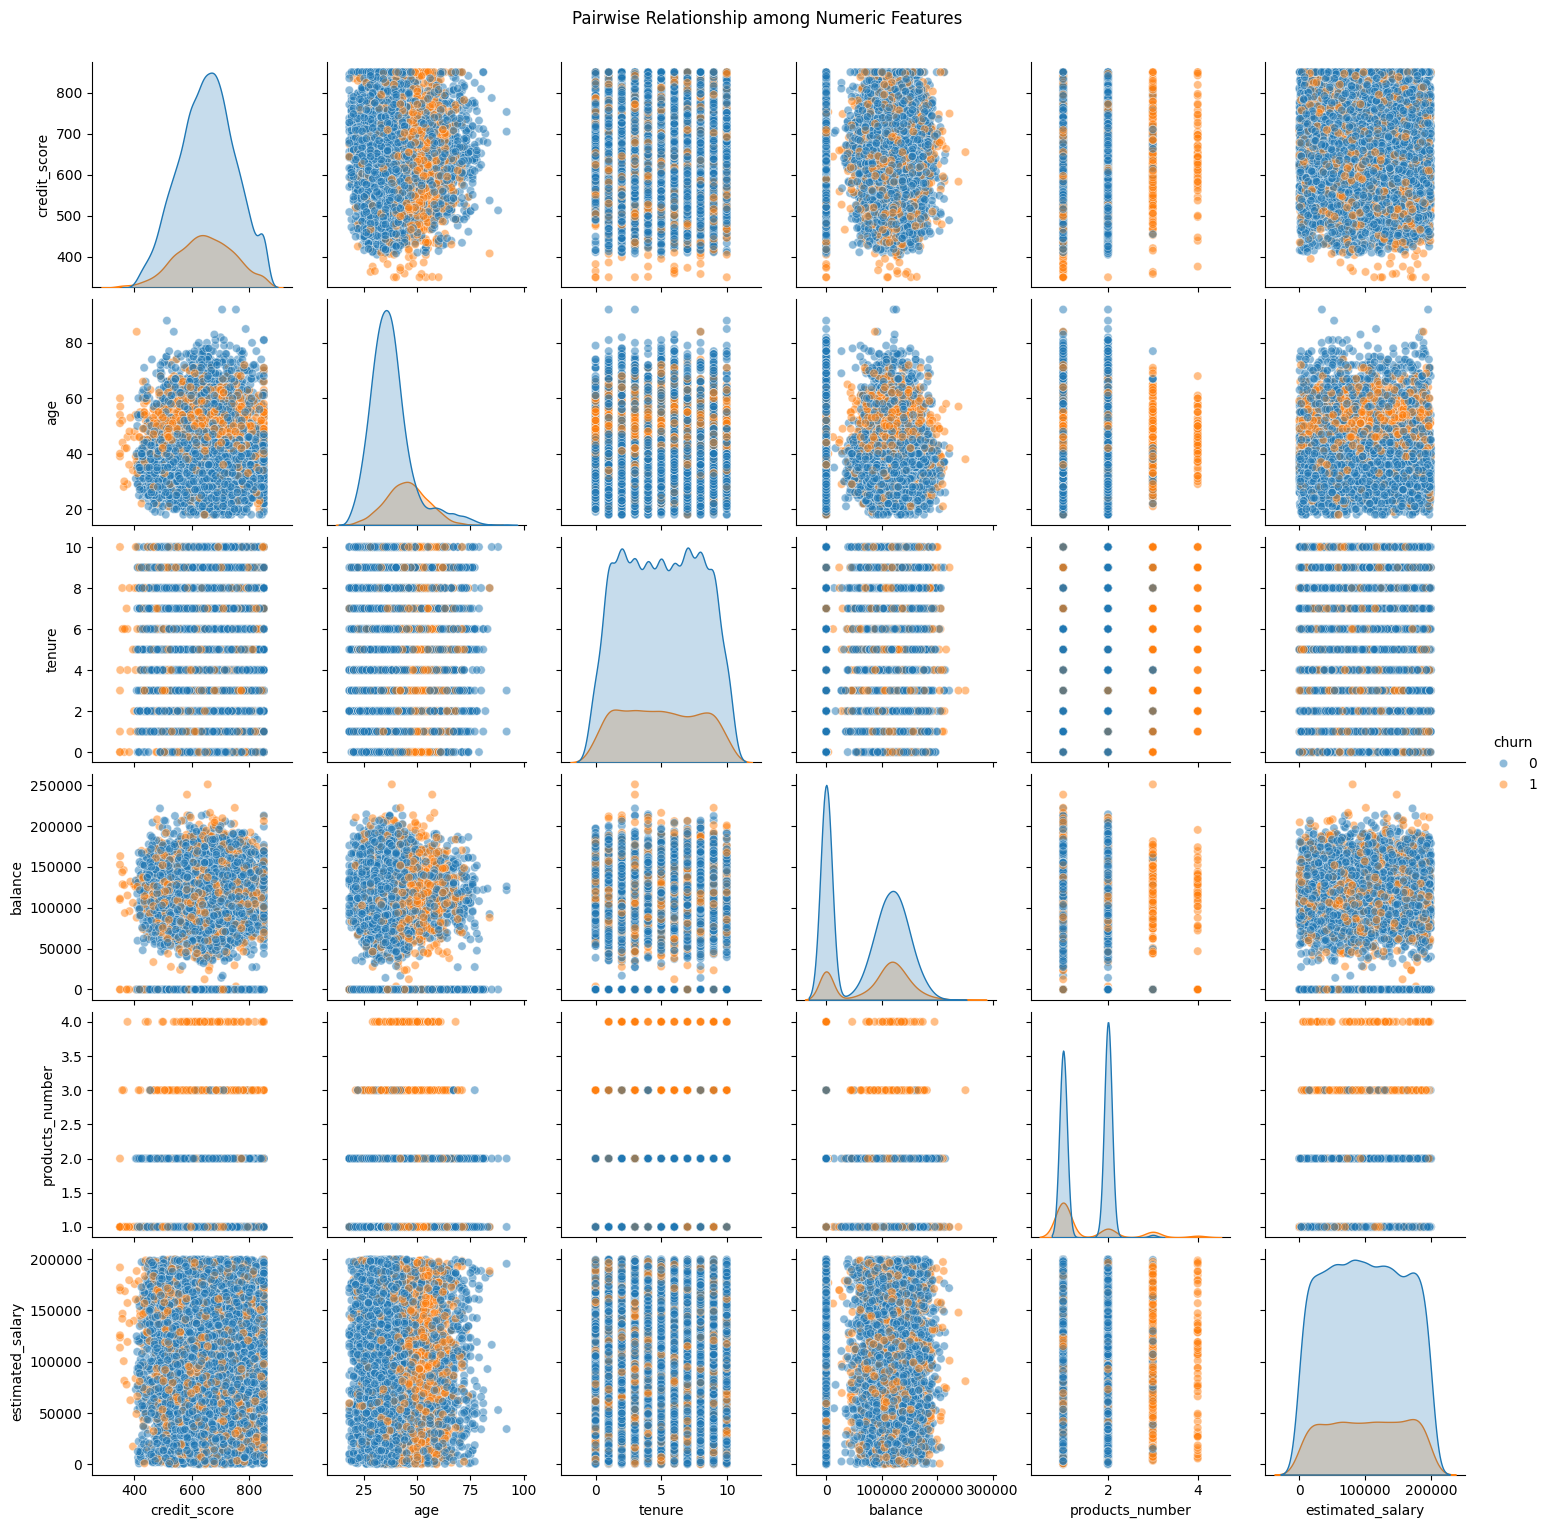

In [10]:
# Pair plot 
sns.pairplot(df,vars=['credit_score','age','tenure','balance','products_number','estimated_salary'],hue='churn',diag_kind='kde',plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationship among Numeric Features',y=1.02)
plt.savefig("../reports/pairplot_churn_distribution.png")
plt.show()

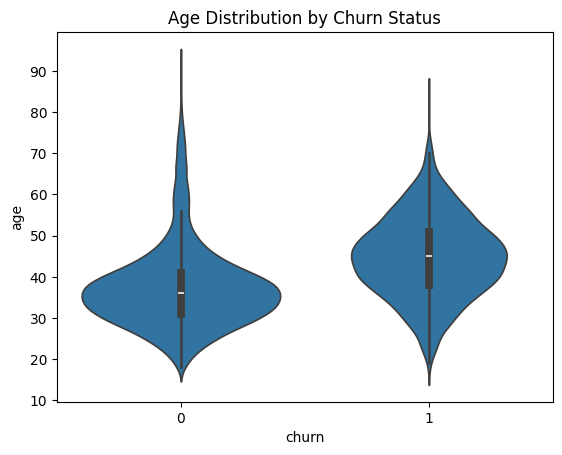

In [11]:
# Violin plots 
sns.violinplot(x='churn', y='age', data=df)
plt.title('Age Distribution by Churn Status')
plt.savefig("../reports/age(violin_plot).png")
plt.show()

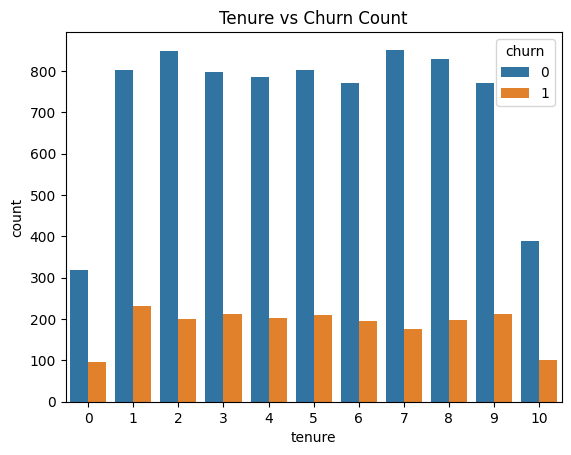

In [12]:
# Tenure vs Churn
sns.countplot(x='tenure', hue='churn', data=df)
plt.title('Tenure vs Churn Count')
plt.savefig("../reports/tenure_vs_churn.png")
plt.show()

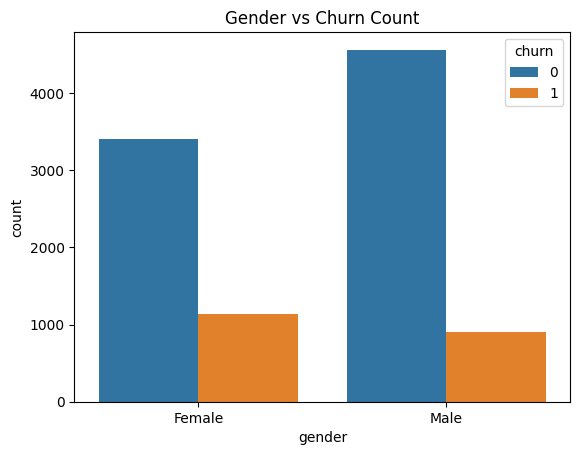

In [13]:
# Gender vs Churn
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Gender vs Churn Count')
plt.savefig("../reports/gender_vs_churn.png")
plt.show()

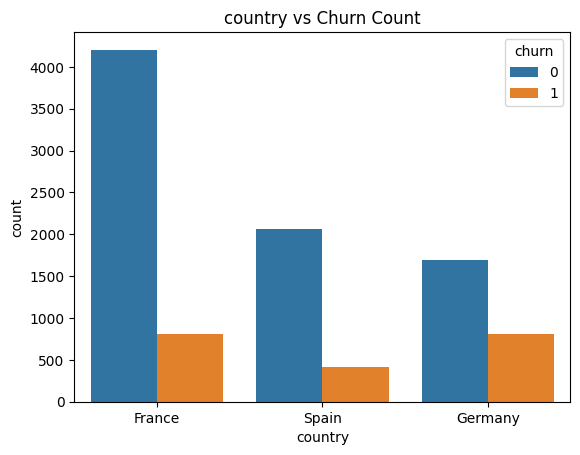

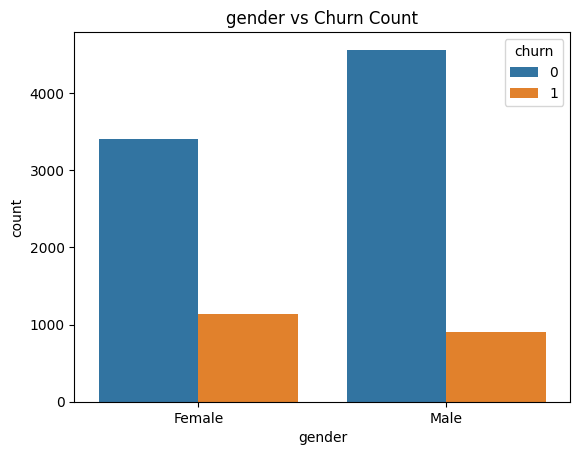

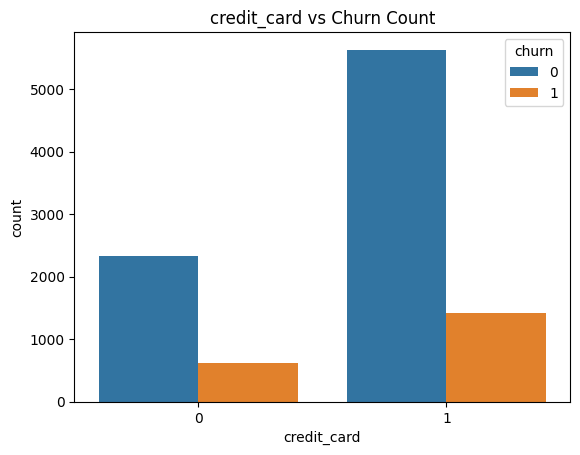

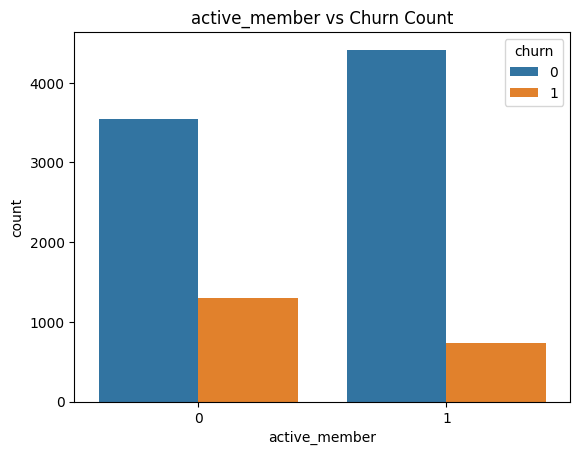

In [14]:
# Categorical Features Distribution
cat_cols=['country','gender','credit_card','active_member']
for cols in cat_cols:
    sns.countplot(x=cols,hue='churn',data=df)
    plt.title(f'{cols} vs Churn Count')
    plt.savefig(f"../reports/{cols}_vs_churn.png")
    plt.show()

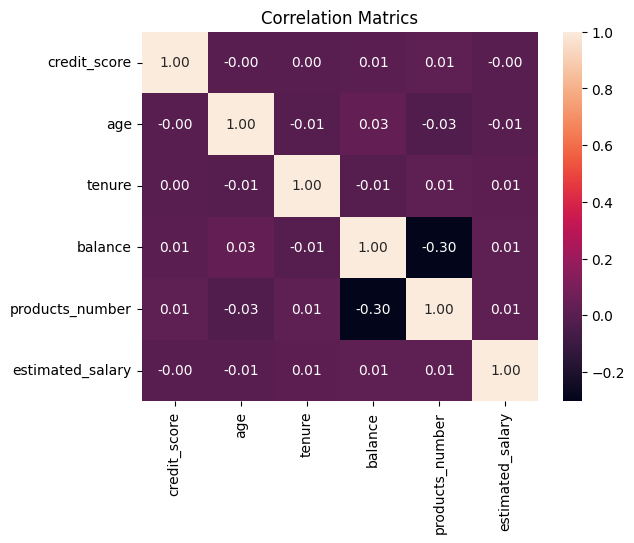

In [15]:
# Heatmap visualization
corr=df[nums_cols].corr()
sns.heatmap(corr,annot=True,fmt='.2f')
plt.title('Correlation Matrics')
plt.savefig("../reports/correlation_matrix.png")
plt.show()

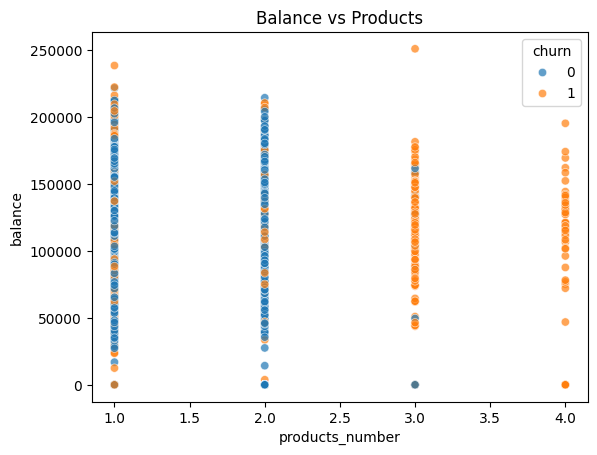

In [16]:
# Balance vs Products scatter
sns.scatterplot(data=df,x='products_number',y='balance',hue='churn',alpha=0.7)
plt.title('Balance vs Products')
plt.savefig("../reports/balance_vs_products.png")
plt.show()

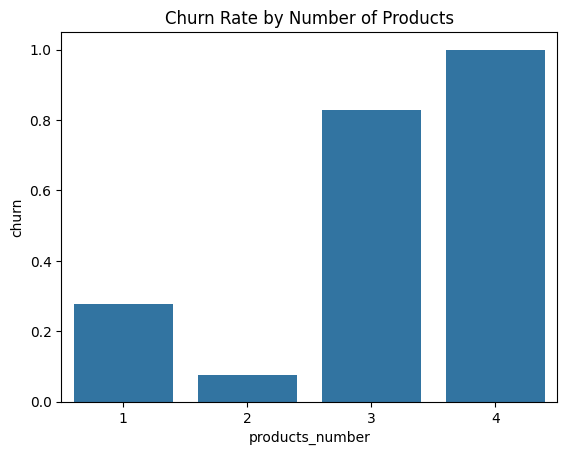

In [17]:
churn_rate=df.groupby('products_number')['churn'].mean().reset_index()
sns.barplot(data=churn_rate,x='products_number',y='churn')
plt.title('Churn Rate by Number of Products')       
plt.savefig("../reports/products_number_vs_churn.png")
plt.show()

Step 5. Feature Engineering

In [18]:
%cd ..
from src.feature_engineering import feature_engineering
df_fe = feature_engineering(df)
df_fe.head()


c:\Users\Janvi Prajapati\OneDrive\Desktop\Projects\Customer Churn


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,balance_per_product,zero_balance,salary_balance_ratio,engaged_customer,age_group,tenure_group,product_category,credit_score_band
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,1,0.000000,1,Mid-age,New,Low,Fair
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,83807.860000,0,1.342864,0,Mid-age,New,Low,Fair
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,53220.266667,0,0.713585,0,Mid-age,Old,High,Poor
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,1,0.000000,0,Mid-age,New,Medium,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,125510.820000,0,0.630098,1,Mid-age,New,Low,Very Good


Step 6. Seperate features and target

In [19]:
X = df_fe.drop(columns=['churn', 'customer_id'])
y = df_fe['churn']

print(X.shape)
print(y.shape)


(10000, 18)
(10000,)


Step 7. Seperate numeric and categorical columns

In [20]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)


Numerical Features: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'balance_per_product', 'zero_balance', 'salary_balance_ratio', 'engaged_customer']
Categorical Features: ['country', 'gender', 'age_group', 'tenure_group', 'product_category', 'credit_score_band']


Step 8. Define preprocessing pipelines

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine both
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


Step 9. Train test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(8000, 18) (2000, 18)
(8000,) (2000,)


Step 10. Train Logistic Regression model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
model.fit(X_train, y_train)



,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Step 11. Evaluate Model

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))



Accuracy: 0.8615


Precision: 0.7708333333333334
Recall: 0.45454545454545453
F1 Score: 0.5718701700154559
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1538   55]
 [ 222  185]]
ROC-AUC: 0.8538847013423284


 Trying with Different Threshold

In [34]:
thresholds = [0.5, 0.45, 0.4, 0.35, 0.3]

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Recall:", recall_score(y_test, y_pred_t))
    print("Precision:", precision_score(y_test, y_pred_t))



Threshold = 0.5
Recall: 0.45454545454545453
Precision: 0.7708333333333334

Threshold = 0.45
Recall: 0.49385749385749383
Precision: 0.7204301075268817

Threshold = 0.4
Recall: 0.5503685503685504
Precision: 0.656891495601173

Threshold = 0.35
Recall: 0.601965601965602
Precision: 0.6140350877192983

Threshold = 0.3
Recall: 0.6388206388206388
Precision: 0.579064587973274


Logistic Regression model Evaluation with 0.35 threshold

In [27]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Get churn probabilities
y_proba_lr = model.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.35
y_pred_lr_035 = (y_proba_lr >= threshold).astype(int)

# Metrics
print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_test, y_pred_lr_035))
print("Precision:", precision_score(y_test, y_pred_lr_035))
print("Recall:", recall_score(y_test, y_pred_lr_035))
print("F1 Score:", f1_score(y_test, y_pred_lr_035))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr_035))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_lr_035))


Threshold: 0.35
Accuracy: 0.842
Precision: 0.6140350877192983
Recall: 0.601965601965602
F1 Score: 0.607940446650124
ROC-AUC: 0.8538847013423284

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:

[[1439  154]
 [ 162  245]]


Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        random_state=42,
        class_weight='balanced'
    ))
])

rf_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluation of Random forest

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Probabilities
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Apply same threshold for fair comparison
y_rf_pred_035 = (y_rf_proba >= 0.35).astype(int)

print(classification_report(y_test, y_rf_pred_035))
print(confusion_matrix(y_test, y_rf_pred_035))
print("ROC-AUC:", roc_auc_score(y_test, y_rf_proba))


              precision    recall  f1-score   support

           0       0.94      0.67      0.79      1593
           1       0.40      0.84      0.54       407

    accuracy                           0.71      2000
   macro avg       0.67      0.76      0.66      2000
weighted avg       0.83      0.71      0.74      2000

[[1074  519]
 [  64  343]]
ROC-AUC: 0.8596408426916902


GradiantBoosting Classifier Model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluating GradintBoosting Classifier

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Predictions (default threshold = 0.5)
y_gb_pred = gb_model.predict(X_test)

# Probabilities (needed for ROC-AUC & threshold tuning)
y_gb_proba = gb_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_gb_pred))
print("Precision:", precision_score(y_test, y_gb_pred))
print("Recall:", recall_score(y_test, y_gb_pred))
print("F1 Score:", f1_score(y_test, y_gb_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_gb_proba))

print("\nClassification Report:\n")
print(classification_report(y_test, y_gb_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_gb_pred))


Accuracy: 0.865
Precision: 0.7644787644787645
Recall: 0.4864864864864865
F1 Score: 0.5945945945945946
ROC-AUC: 0.8698606156233275

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.49      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000

Confusion Matrix:

[[1532   61]
 [ 209  198]]


In [ ]:

thresholds = [0.5, 0.45, 0.4, 0.35, 0.3]

for t in thresholds:
    y_pred_t = (y_gb_proba >= t).astype(int)
    
    print(f"\nThreshold = {t}")
    print("Precision:", precision_score(y_test, y_pred_t))
    print("Recall:", recall_score(y_test, y_pred_t))
    print("F1:", f1_score(y_test, y_pred_t))



Threshold = 0.5
Precision: 0.7644787644787645
Recall: 0.4864864864864865
F1: 0.5945945945945946

Threshold = 0.4
Precision: 0.717948717948718
Recall: 0.5503685503685504
F1: 0.6230876216968011

Threshold = 0.35
Precision: 0.6648351648351648
Recall: 0.5945945945945946
F1: 0.6277561608300908

Threshold = 0.3
Precision: 0.6202830188679245
Recall: 0.6461916461916462
F1: 0.6329723225030084


In [33]:
# Final predictions using best threshold
best_threshold = 0.3
y_final_pred = (y_gb_proba >= best_threshold).astype(int)

print("Final Model: Gradient Boosting")
print("Threshold:", best_threshold)
print("Accuracy:", accuracy_score(y_test, y_final_pred))
print("Precision:", precision_score(y_test, y_final_pred))
print("Recall:", recall_score(y_test, y_final_pred))
print("F1:", f1_score(y_test, y_final_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_gb_proba))

print("\nClassification Report:\n")
print(classification_report(y_test, y_final_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_final_pred))


Final Model: Gradient Boosting
Threshold: 0.3
Accuracy: 0.8475
Precision: 0.6202830188679245
Recall: 0.6461916461916462
F1: 0.6329723225030084
ROC-AUC: 0.8698606156233275

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1593
           1       0.62      0.65      0.63       407

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000


Confusion Matrix:

[[1432  161]
 [ 144  263]]
